<a href="https://colab.research.google.com/github/ubiodee/yolo_identification/blob/main/resnet50_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [1]:
%cd /content/gdrive/MyDrive/resnet50_test3

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/resnet50_test3'
/content


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import pathlib
dataset_url = "https://drive.google.com/file/d/1bFyuipnqa-FhSGMZOwMqZtPDnqhPMWLK/view?usp=drive_link"
data_dir = tf.keras.utils.get_file('/content/gdrive/MyDrive/resnet50_test3', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:

print(data_dir)

/content/gdrive/MyDrive/resnet50_test3


/content/gdrive/MyDrive/resnet50_test3/disease/acbc36cd-9c39-419b-95da-7858806a063a___GCREC_Bact.Sp 3811.JPG


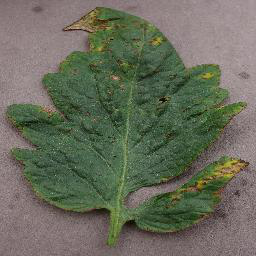

In [ ]:
healthy = list(data_dir.glob('disease/*'))
print(healthy[7])
PIL.Image.open(str(healthy[7]))

In [ ]:
print(data_dir)

/content/gdrive/MyDrive/resnet50_test3


/content/gdrive/MyDrive/resnet50_test3/disease/71eb9b0a-a7ea-47a0-8108-71949d74e22d___RS_Erly.B 7557.JPG


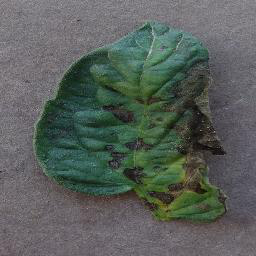

In [ ]:

healthy = list(data_dir.glob('disease/*'))
print(healthy[9])
PIL.Image.open(str(healthy[9]))

In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1888 files belonging to 2 classes.
Using 1511 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1888 files belonging to 2 classes.
Using 377 files for validation.


In [ ]:

class_names = train_ds.class_names
print(class_names)

['disease', 'healthy']


In [ ]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False, # my dimension of images are diff than resnet50 was trianed on
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')


for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [ ]:

resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_9 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
__________________________________

In [ ]:

resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 10s 107ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 2/10
48/48 [==============================] - 5s 93ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 3/10
48/48 [==============================] - 4s 76ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 4/10
48/48 [==============================] - 4s 82ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 5/10
48/48 [==============================] - 6s 116ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 6/10
48/48 [==============================] - 4s 75ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss: 0.0000e+00 - val_accuracy: 0.5756
Epoch 7/10
48/48 [==============================] - 4s 73ms/step - loss: 0.0000e+00 - accuracy: 0.5844 - val_loss:

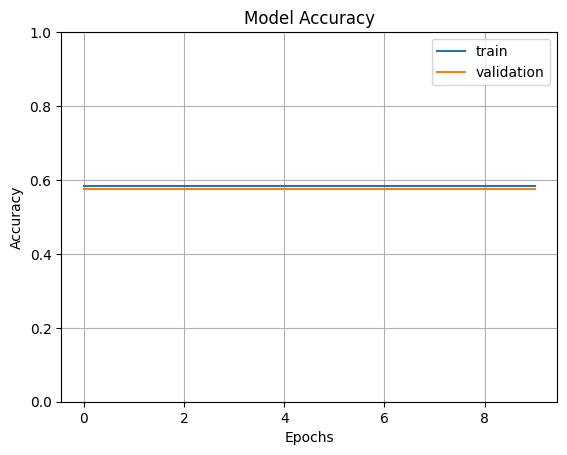

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

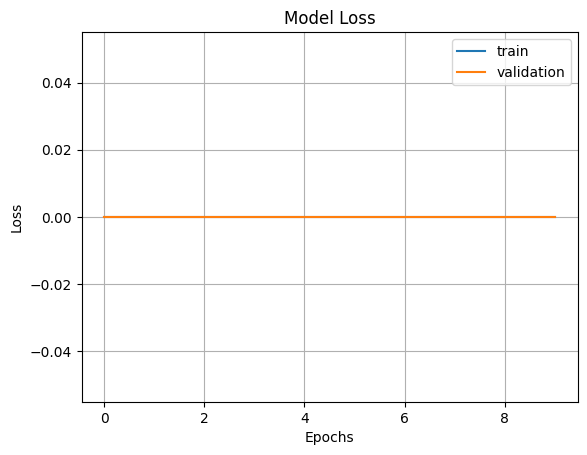

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()